# REGRESSAO LOGISTICA

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import scipy.stats as stats
import warnings

In [13]:
df = pd.read_csv('08notsmote_FEAUTURES.csv')
df = pd.read_csv('10ma_FEAUTURES.csv')
df.head()

,Appetite(MA3),pEffort(MA3),Sex_F,SleepInd(MA3),uaI(MA3),DeltaWt (%)(MA3),FatigInd
0,5.193648,5.260414,1,-4.975425,2.240202,-0.003578,Optimal
1,6.000000,3.230228,1,-6.265990,1.999969,0.000167,Optimal
2,5.537896,2.991013,0,-3.682606,0.780255,0.000021,Optimal
3,6.000000,5.038346,1,-5.825337,2.431632,-0.000004,Optimal
4,6.003911,7.190867,1,-5.477133,1.967599,-0.003108,Optimal


In [14]:
X = df.drop(columns=["FatigInd"])
y = df["FatigInd"]

# standartizar os dados e separar treino de teste

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((511, 6), (128, 6))

## modelo base

In [16]:
#warnings.filterwarnings("ignore")

# Define the model
model = LogisticRegression(max_iter=10000)

# Define the hyperparameter distribution
param_dist = {
    'penalty': ["l1", "l2"],
    'C': stats.uniform(0.01, 300),  # Continuous range for C
    'solver': ['saga']  # Continuous range for l1_ratio
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist, # Hyperparameter distribution
                                   n_iter=70, # iterations 
                                   cv=7, # cross-validation
                                   scoring='accuracy', # metric
                                   random_state=21) # seed
random_search.fit(X_train, y_train)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Best Parameters: {'C': np.float64(14.627464242738187), 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.5694716242661448


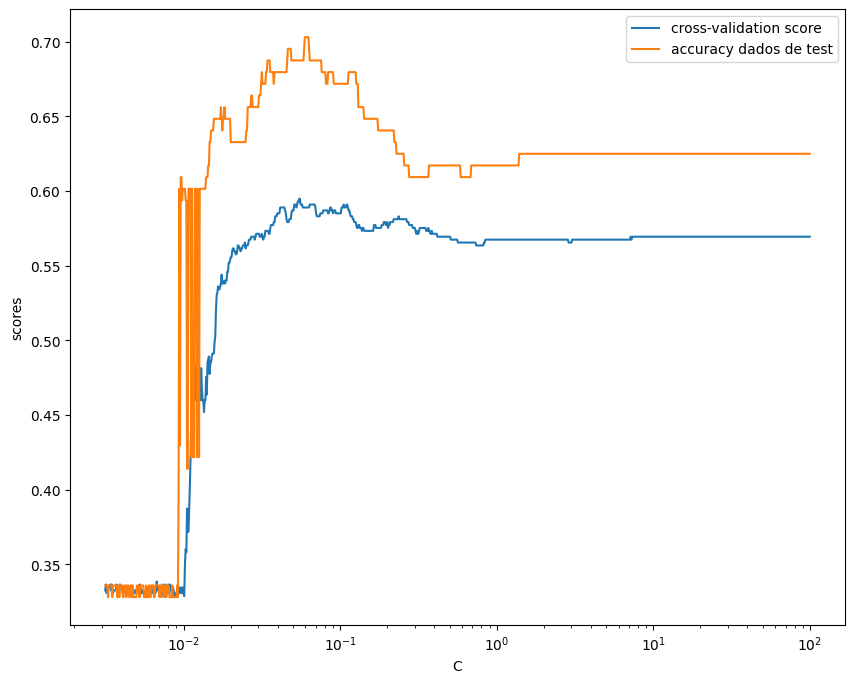

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# Define the range for hyperparameters
C = np.logspace(-2.5, 2, num=1000) #np.arange(0.001, 100, 0.1)
a = []
acc = []

# Loop over C and l1_ratio to calculate cross-validation scores
for c in C:
    model = LogisticRegression(C=c, penalty="l1", max_iter=1000, solver='saga')
    scores = cross_val_score(model, X_train, y_train, cv=7, scoring='accuracy')
    a.append(scores.mean())
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    acc.append(test_accuracy)
    

# Plot the 2D topographic map using contour
plt.figure(figsize=(10, 8))

plt.plot(C, a, label="cross-validation score")
plt.plot(C, acc, label="accuracy dados de test")
plt.legend()

# Add labels and title
plt.xlabel('C')
plt.ylabel('scores')
plt.xscale('log')

plt.show()


In [18]:
# Define the model with the best parameters
#best_model = LogisticRegression(
#    C= 6.4948749747849375,  # Best C
#    penalty='l1', # Best penalty
#    solver='saga',   # Best solver
#    max_iter=5000         # Ensure convergence
#)

best_model = random_search.best_estimator_

In [19]:
# Set up K-Fold Cross Validation
k = 7  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='accuracy')

# Print the results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.2f}")
print(f"Standard deviation: {scores.std():.2f}")


Cross-validation scores: [0.47945205 0.68493151 0.54794521 0.63013699 0.63013699 0.45205479
 0.61643836]
Mean accuracy: 0.58
Standard deviation: 0.08


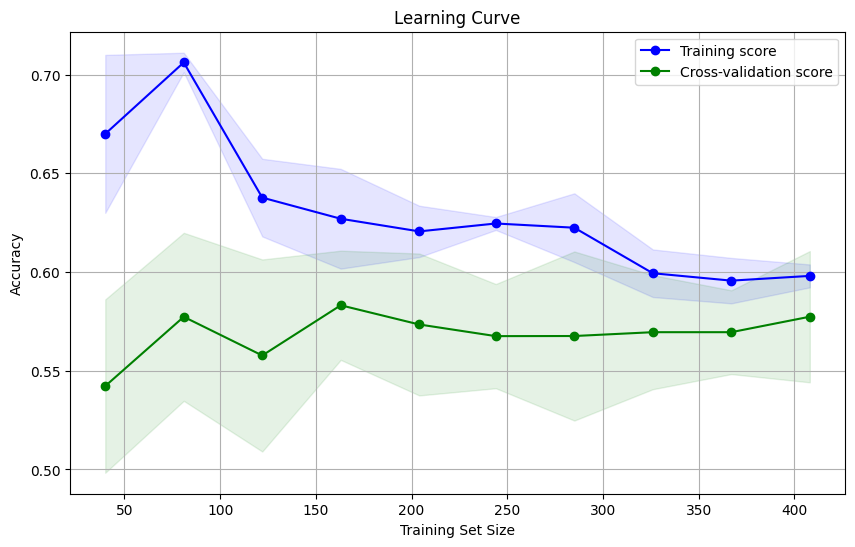

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


# medidas de avaliacao

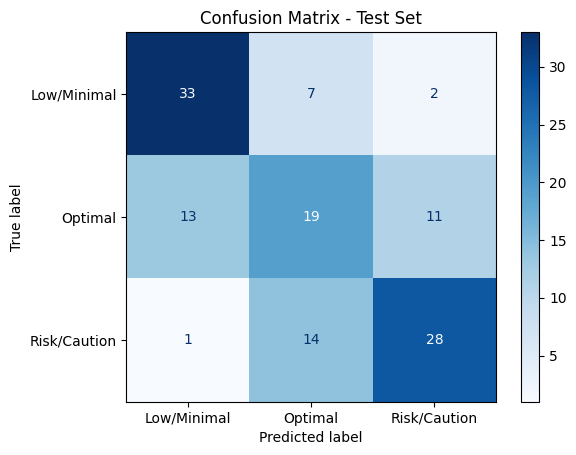

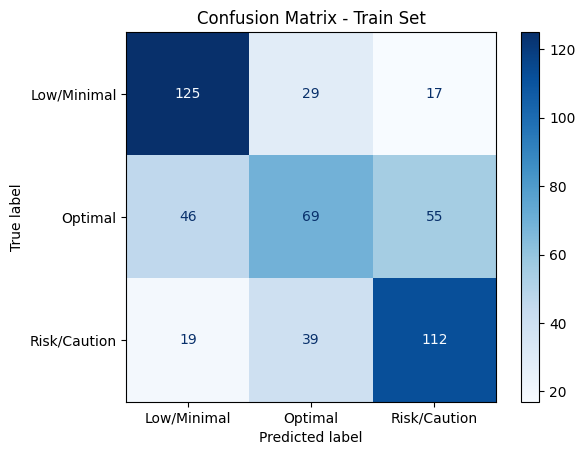

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming X (features) and y (labels) are defined elsewhere in your code

# Split the data into train and test sets

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Generate the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix for the test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_)
disp_test.plot(cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.show()

# Optionally, you can also generate confusion matrix for the training set
y_pred_train = best_model.predict(X_train)

# Generate the confusion matrix for the train set
cm_train = confusion_matrix(y_train, y_pred_train)

# Display the confusion matrix for the train set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=best_model.classes_)
disp_train.plot(cmap="Blues")
plt.title("Confusion Matrix - Train Set")
plt.show()


In [22]:
from sklearn.metrics import classification_report

y_pred_test = best_model.predict(X_test)
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

 Low/Minimal       0.70      0.79      0.74        42
     Optimal       0.47      0.44      0.46        43
Risk/Caution       0.68      0.65      0.67        43

    accuracy                           0.62       128
   macro avg       0.62      0.63      0.62       128
weighted avg       0.62      0.62      0.62       128



In [23]:
y_pred_train = best_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

 Low/Minimal       0.66      0.73      0.69       171
     Optimal       0.50      0.41      0.45       170
Risk/Caution       0.61      0.66      0.63       170

    accuracy                           0.60       511
   macro avg       0.59      0.60      0.59       511
weighted avg       0.59      0.60      0.59       511

